In [1]:
from config import *
from dataset import bandpass_filter
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib
%matplotlib notebook

In [2]:
df = pd.read_csv('../ECG_Data/WA20_pre1001.txt', header=None, usecols=[1])

In [10]:
ecg = np.array(df[1][0:50000])

<IPython.core.display.Javascript object>


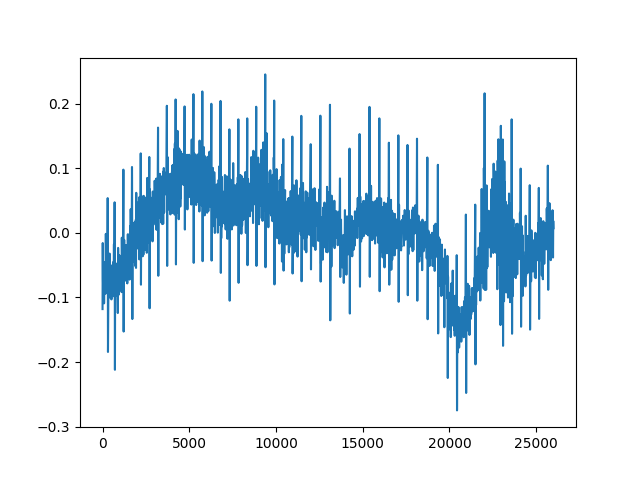

In [4]:
plt.plot(ecg)
plt.show()

<IPython.core.display.Javascript object>


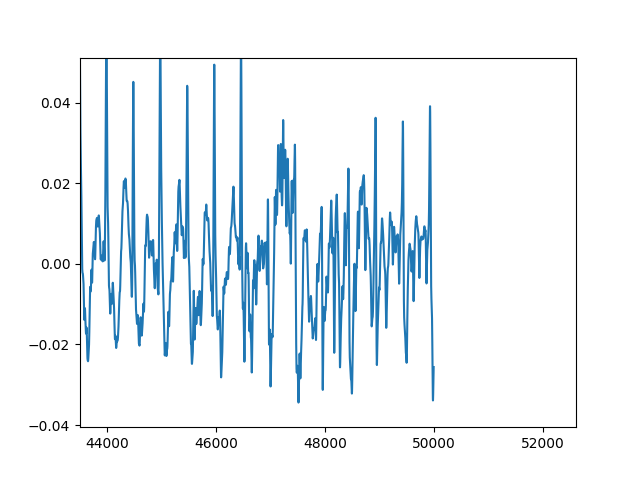

interactive(children=(IntSlider(value=1, description='order_new', max=10), IntSlider(value=20, description='lo…

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(bandpass_filter(ecg, order, low_cutoff, high_cutoff, nyq))
ax.axis([0, 10000, -0.1, 0.1])

def update(order_new=order, low=20, high=40, n=nyq):
    line.set_ydata(bandpass_filter(ecg, order_new, low, high, n))
    fig.canvas.draw_idle()

interact(update, order_new = (0, 10, 1), low=(0, 200, 1), high=(0, 400, 1));

<IPython.core.display.Javascript object>


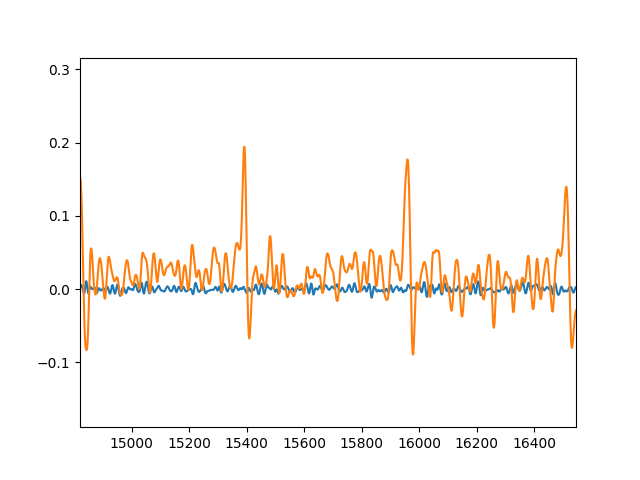

C:\Users\tonyz\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


interactive(children=(IntSlider(value=500, description='high_cutoff', max=1000), IntSlider(value=50, descripti…

<function __main__.update(high_cutoff, low_cutoff)>

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
from scipy.fft import fft, ifft

def fft_filter(ecg, cutoff_high=200, cutoff_low=0):
    fft_signal = fft(ecg)
    
    # Identify noise frequencies and mask them out
    # For example, setting frequencies with too high amplitude to zero
    fft_signal[np.logical_or(np.abs(fft_signal) > cutoff_high, np.abs(fft_signal) < cutoff_low)] = 0
    
    # Inverse Fourier Transform to get the cleaned signal
    ecg = ifft(fft_signal)
    return ecg

line, = ax.plot(fft_filter(ecg))

def update(high_cutoff, low_cutoff):
    line.set_ydata(fft_filter(ecg, high_cutoff, low_cutoff))
    fig.canvas.draw_idle()

interact(update, high_cutoff = (0, 1000, 1), low_cutoff=(0, 100, 1))

<IPython.core.display.Javascript object>


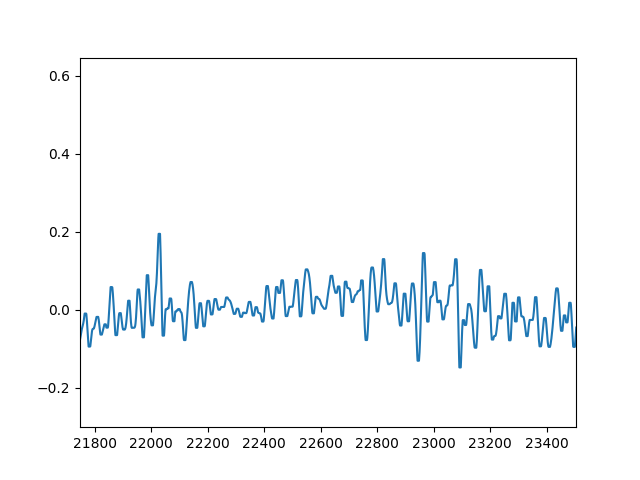

interactive(children=(IntSlider(value=10, description='kernel_size', max=19, min=1, step=3), Output()), _dom_c…

<function __main__.update(kernel_size)>

In [22]:
from scipy.signal import medfilt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

medfilter_ecg = medfilt(ecg, kernel_size=3)
line, = ax.plot(medfilter_ecg)

def round_up_to_odd(f):
    return int(np.ceil(f) // 2 * 2 + 1)

def update(kernel_size):
    line.set_ydata(medfilt(ecg, round_up_to_odd(kernel_size)))
    fig.canvas.draw_idle()
    
interact(update, kernel_size=(1, 19, 3))

<IPython.core.display.Javascript object>


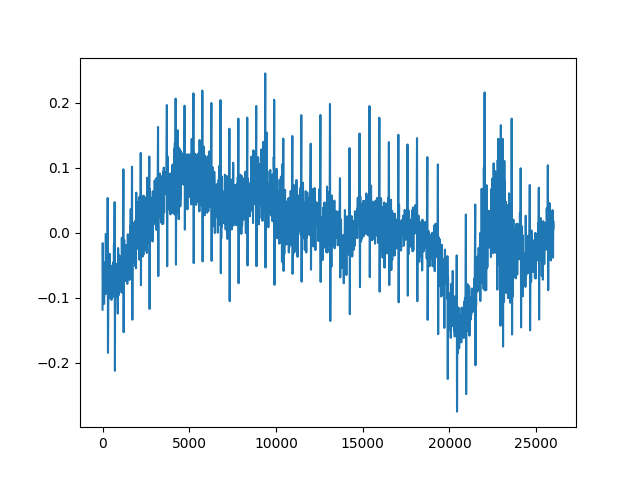

interactive(children=(IntSlider(value=1, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

<function __main__.update(n=1)>

In [36]:
from sklearn.decomposition import FastICA, PCA
def ica_denoising(data, n_components=1):
    ica = PCA(n_components=n_components)
    components = ica.fit_transform(data)
    clean_data = ica.inverse_transform(components)
    return clean_data

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ecg_temp = ecg[:, np.newaxis]

ica_ecg = ica_denoising(ecg_temp)
line, = ax.plot(g_ecg)


def update(n=1):
    line.set_ydata(ica_denoising(ecg_temp, n))
    fig.canvas.draw_idle()
    
interact(update, n=(1, 10, 1))

<IPython.core.display.Javascript object>


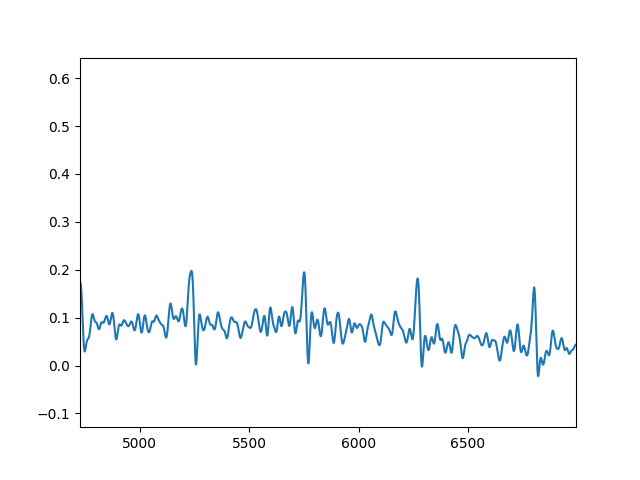

interactive(children=(FloatSlider(value=2.5000000000000004, description='sigma', max=5.0, min=0.1), Output()),…

<function __main__.update(sigma)>

In [27]:
from scipy.ndimage import gaussian_filter1d

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

g_ecg = gaussian_filter1d(ecg, sigma=1)
line, = ax.plot(g_ecg)


def update(sigma):
    line.set_ydata(gaussian_filter1d(ecg, sigma))
    fig.canvas.draw_idle()
    
interact(update, sigma=(0.1, 5, 0.1))